<a href="https://colab.research.google.com/github/Chathura789/Chathura789/blob/main/Final_Exploring_Companies_house_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://creatingwithdata.com/exploring-data-from-companies-house/

In [ ]:
api_key ="	c8f44043-a29b-4cc8-888d-411c359d2ef6"

In [2]:
pip install companies_house_api_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for companies_house_api_client: filename=companies_house_api_client-0.0.3-py3-none-any.whl size=6519 sha256=0ec7c6f0a555133354352f26a46c2f245d7fec8324f5c3909181aa25f670b992
  Stored in directory: /root/.cache/pip/wheels/dc/09/6c/1502a10ad4afa3bc63b6256ff2f20d8f6b66ecfe8161b24bd2
Successfully built companies_house_api_client


In [ ]:
#old working

#old url https://pypi.org/project/companies-house-api-client/#:~:text=You%20can%20install%20the%20package%20into%20your%20project,required%20credentials%3A%20export%20COMPANIES_HOUSE_APIKEY%3D%20your-api-key%20export%20COMPANIES_HOUSE_HOST%3D%20https%3A%2F%2Fapi.company-information.service.gov.uk
export COMPANIES_HOUSE_APIKEY=api_key
export COMPANIES_HOUSE_HOST="https://api.company-information.service.gov.uk"

SyntaxError: ignored

In [ ]:
# old working ignore
##
from companies_house_api_client import CompaniesHouse

# Create a Companies House API client instance
ch = CompaniesHouse()

# Call an API method
companies = ch.get_company_profile("12312312")

# from rory's post

In [ ]:
import httpx
import json
import csv
import time

with open('Companies-House-search-results.csv', newline='') as f:
  reader = csv.reader(f)
  data = list(reader)

for row in data:
  company_number = row[1]
  print(company_number)

auth_token="insert-your-key"

officer_results = []
for row in data:
  company_number = row[1]
  print(company_number)
  response = httpx.get("https://api.company-information.service.gov.uk/company/%s/officers" % company_number, auth=(auth_token, ""))
  result = json.loads(response.content)
  result["company_number"] = company_number # result doesnt have the number, we will save it here
  officer_results.append(result)
  time.sleep(2.1)

with open('details.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["company_number", "active_officers", "sole_directorship"])
  for result in officer_results:
    resigned_count = result.get("resigned_count", 0)
    active_count   = result.get("active_count", 0)
    sole_directorship = (resigned_count == 0 and active_count == 1)
    writer.writerow([result.get("company_number", ""), result.get("active_count", ""), sole_directorship])

In [4]:
!pip install httpx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00


Session start

In [5]:

import json
import httpx
auth_tuple =("2536749e-3c25-4874-bf59-f717b20caa2f","")
response = httpx.get("https://data.police.uk/api/crime-categories?date=2011-08")
json.loads(response.content)




[{'url': 'all-crime', 'name': 'All crime'},
 {'url': 'anti-social-behaviour', 'name': 'Anti-social behaviour'},
 {'url': 'bicycle-theft', 'name': 'Bicycle theft'},
 {'url': 'burglary', 'name': 'Burglary'},
 {'url': 'criminal-damage-arson', 'name': 'Criminal damage and arson'},
 {'url': 'drugs', 'name': 'Drugs'},
 {'url': 'other-theft', 'name': 'Other theft'},
 {'url': 'possession-of-weapons', 'name': 'Possession of weapons'},
 {'url': 'public-order', 'name': 'Public order'},
 {'url': 'robbery', 'name': 'Robbery'},
 {'url': 'shoplifting', 'name': 'Shoplifting'},
 {'url': 'theft-from-the-person', 'name': 'Theft from the person'},
 {'url': 'vehicle-crime', 'name': 'Vehicle crime'},
 {'url': 'violent-crime', 'name': 'Violence and sexual offences'},
 {'url': 'other-crime', 'name': 'Other crime'}]

In [6]:

import requests

def get_crime_data(poly, date=None):
    base_url = "https://data.police.uk/api/crimes-street/all-crime?"
    poly_string = ":".join([str(coord[0])+','+str(coord[1]) for coord in poly])

    url = base_url + 'poly=' + poly_string
    if date:
        url = url + '&date=' + date

    response = requests.get(url)

    # check for successful request
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Define a rough approximation of Aberdeen's boundary
aberdeen_poly = [
    [57.18, -2.16],  # Southwest point
    [57.18, -2.08],  # Southeast point
    [57.15, -2.08],  # Northeast point
    [57.15, -2.16]   # Northwest point
]

data = get_crime_data(aberdeen_poly, '2021-06')


In [7]:
import requests
from datetime import datetime

def get_crime_data(poly, start_year, end_year):
    base_url = "https://data.police.uk/api/crimes-street/all-crime?"
    poly_string = ":".join([str(coord[0])+','+str(coord[1]) for coord in poly])

    # Prepare list to store all the data
    all_data = []

    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            # format the month and create the URL
            date = str(year) + '-' + str(month).zfill(2)
            url = base_url + 'poly=' + poly_string + '&date=' + date

            response = requests.get(url)

            if response.status_code == 200:
                all_data.extend(response.json())
            else:
                print(f"Request failed for {date} with status code {response.status_code}")

    return all_data

# Define a rough approximation of Aberdeen's boundary
aberdeen_poly = [
    [57.18, -2.16],  # Southwest point
    [57.18, -2.08],  # Southeast point
    [57.15, -2.08],  # Northeast point
    [57.15, -2.16]   # Northwest point
]

# Get data from 2020 to 2023
data = get_crime_data(aberdeen_poly, 2020, 2023)


Request failed for 2020-01 with status code 404
Request failed for 2020-02 with status code 404
Request failed for 2020-03 with status code 404
Request failed for 2020-04 with status code 404
Request failed for 2023-06 with status code 404
Request failed for 2023-07 with status code 404
Request failed for 2023-08 with status code 404
Request failed for 2023-09 with status code 404
Request failed for 2023-10 with status code 404
Request failed for 2023-11 with status code 404
Request failed for 2023-12 with status code 404


In [8]:
print(data)

[]


In [ ]:
all_data

NameError: ignored

In [9]:
import json
import httpx
auth_tuple =("2536749e-3c25-4874-bf59-f717b20caa2f","")
response = httpx.get("https://api.company-information.service.gov.uk/company/SC126553",auth=auth_tuple)
json.loads(response.content)

{'has_been_liquidated': False,
 'undeliverable_registered_office_address': False,
 'jurisdiction': 'scotland',
 'accounts': {'accounting_reference_date': {'month': '09', 'day': '30'},
  'next_due': '2024-06-30',
  'last_accounts': {'type': 'group',
   'made_up_to': '2022-09-30',
   'period_end_on': '2022-09-30',
   'period_start_on': '2021-10-01'},
  'overdue': False,
  'next_made_up_to': '2023-09-30',
  'next_accounts': {'due_on': '2024-06-30',
   'period_end_on': '2023-09-30',
   'period_start_on': '2022-10-01',
   'overdue': False}},
 'last_full_members_list_date': '2015-07-24',
 'company_name': 'PETROLEUM EXPERTS LIMITED',
 'company_number': 'SC126553',
 'type': 'ltd',
 'date_of_creation': '1990-08-02',
 'sic_codes': ['72190'],
 'registered_office_address': {'locality': 'Edinburgh',
  'postal_code': 'EH7 4HG',
  'address_line_1': 'Petex House',
  'address_line_2': '10 Logie Mill'},
 'has_insolvency_history': False,
 'etag': '89c9e61c772f9c5c1978be127cb0f47f99b57f08',
 'has_charges'

In [10]:
response = httpx.get("https://api.company-information.service.gov.uk/company/SC126553",auth=auth_tuple)
json.loads(response.content)

{'has_been_liquidated': False,
 'undeliverable_registered_office_address': False,
 'jurisdiction': 'scotland',
 'accounts': {'accounting_reference_date': {'month': '09', 'day': '30'},
  'next_due': '2024-06-30',
  'last_accounts': {'type': 'group',
   'made_up_to': '2022-09-30',
   'period_end_on': '2022-09-30',
   'period_start_on': '2021-10-01'},
  'overdue': False,
  'next_made_up_to': '2023-09-30',
  'next_accounts': {'due_on': '2024-06-30',
   'period_end_on': '2023-09-30',
   'period_start_on': '2022-10-01',
   'overdue': False}},
 'last_full_members_list_date': '2015-07-24',
 'company_name': 'PETROLEUM EXPERTS LIMITED',
 'company_number': 'SC126553',
 'type': 'ltd',
 'date_of_creation': '1990-08-02',
 'sic_codes': ['72190'],
 'registered_office_address': {'locality': 'Edinburgh',
  'postal_code': 'EH7 4HG',
  'address_line_1': 'Petex House',
  'address_line_2': '10 Logie Mill'},
 'has_insolvency_history': False,
 'etag': '89c9e61c772f9c5c1978be127cb0f47f99b57f08',
 'has_charges'

In [11]:

#Are our results in city of Aberdeen


response = httpx.get("https://api.company-information.service.gov.uk/advanced-search/companies?location=Aberdeen", auth=auth_tuple)
json.loads(response.content)

{'etag': 'f96ab0f516e8f0e9312fa147266228c65febc5ef',
 'top_hit': {'company_name': 'MONTI MOTORCYCLE SERVICES LIMITED',
  'company_number': '12763078',
  'company_status': 'dissolved',
  'company_type': 'ltd',
  'kind': 'search-results#company',
  'links': {'company_profile': '/company/12763078'},
  'date_of_cessation': '2022-01-04',
  'date_of_creation': '2020-07-23',
  'registered_office_address': {'address_line_1': '26 Aberdeen Road',
   'locality': 'London',
   'postal_code': 'N18 2ED',
   'country': 'England'},
  'sic_codes': ['45400']},
 'items': [{'company_name': 'MONTI MOTORCYCLE SERVICES LIMITED',
   'company_number': '12763078',
   'company_status': 'dissolved',
   'company_type': 'ltd',
   'kind': 'search-results#company',
   'links': {'company_profile': '/company/12763078'},
   'date_of_cessation': '2022-01-04',
   'date_of_creation': '2020-07-23',
   'registered_office_address': {'address_line_1': '26 Aberdeen Road',
    'locality': 'London',
    'postal_code': 'N18 2ED',
 

In [12]:
# dig-notsearchfn
# Better off using postcodes, see: https://en.wikipedia.org/wiki/AB_postcode_area

response = httpx.get("https://api.company-information.service.gov.uk/advanced-search/companies?location=AB10", auth=auth_tuple)
json.loads(response.content)

{'etag': '7ae2798f92749f7bb3b82eac1dd573dc3cf9ae2e',
 'top_hit': {'company_name': 'INSPECSERV UK LTD',
  'company_number': 'SC603128',
  'company_status': 'dissolved',
  'company_type': 'ltd',
  'kind': 'search-results#company',
  'links': {'company_profile': '/company/SC603128'},
  'date_of_cessation': '2020-09-22',
  'date_of_creation': '2018-07-20',
  'registered_office_address': {'address_line_1': '487 Great Western Road Great Western Road',
   'locality': 'Aberdeen',
   'postal_code': 'AB10 6NN',
   'country': 'United Kingdom'},
  'sic_codes': ['74909']},
 'items': [{'company_name': 'INSPECSERV UK LTD',
   'company_number': 'SC603128',
   'company_status': 'dissolved',
   'company_type': 'ltd',
   'kind': 'search-results#company',
   'links': {'company_profile': '/company/SC603128'},
   'date_of_cessation': '2020-09-22',
   'date_of_creation': '2018-07-20',
   'registered_office_address': {'address_line_1': '487 Great Western Road Great Western Road',
    'locality': 'Aberdeen',
 

In [13]:
# We have loads and loads of results, let's just return a few keep things lean for now...

response = httpx.get("https://api.company-information.service.gov.uk/advanced-search/companies?location=AB10&size=3", auth=auth_tuple)
json.loads(response.content)

# we can page through by specifying the 'start_index'

{'etag': 'c6e78ce0bbe9687d2216e7df7bd687aae18e7476',
 'top_hit': {'company_name': 'INSPECSERV UK LTD',
  'company_number': 'SC603128',
  'company_status': 'dissolved',
  'company_type': 'ltd',
  'kind': 'search-results#company',
  'links': {'company_profile': '/company/SC603128'},
  'date_of_cessation': '2020-09-22',
  'date_of_creation': '2018-07-20',
  'registered_office_address': {'address_line_1': '487 Great Western Road Great Western Road',
   'locality': 'Aberdeen',
   'postal_code': 'AB10 6NN',
   'country': 'United Kingdom'},
  'sic_codes': ['74909']},
 'items': [{'company_name': 'INSPECSERV UK LTD',
   'company_number': 'SC603128',
   'company_status': 'dissolved',
   'company_type': 'ltd',
   'kind': 'search-results#company',
   'links': {'company_profile': '/company/SC603128'},
   'date_of_cessation': '2020-09-22',
   'date_of_creation': '2018-07-20',
   'registered_office_address': {'address_line_1': '487 Great Western Road Great Western Road',
    'locality': 'Aberdeen',
 

In [14]:
# Location + sic_codes: 66 hits

response = httpx.get("https://api.company-information.service.gov.uk/advanced-search/companies?location=AB10&size=3&sic_codes=62012", auth=auth_tuple)
json.loads(response.content)

{'etag': '610177f4b92cea1376652d9cae085c75c4bd1e2a',
 'top_hit': {'company_name': 'BSPOQ LIMITED',
  'company_number': 'SC654410',
  'company_status': 'dissolved',
  'company_type': 'ltd',
  'kind': 'search-results#company',
  'links': {'company_profile': '/company/SC654410'},
  'date_of_cessation': '2021-08-24',
  'date_of_creation': '2020-02-13',
  'registered_office_address': {'address_line_1': '11 Thistle Place',
   'locality': 'Aberdeen',
   'postal_code': 'AB10 1UZ',
   'country': 'Scotland'},
  'sic_codes': ['62012']},
 'items': [{'company_name': 'BSPOQ LIMITED',
   'company_number': 'SC654410',
   'company_status': 'dissolved',
   'company_type': 'ltd',
   'kind': 'search-results#company',
   'links': {'company_profile': '/company/SC654410'},
   'date_of_cessation': '2021-08-24',
   'date_of_creation': '2020-02-13',
   'registered_office_address': {'address_line_1': '11 Thistle Place',
    'locality': 'Aberdeen',
    'postal_code': 'AB10 1UZ',
    'country': 'Scotland'},
   'si

In [15]:
# Location + multiple sic_codes ... check the hits!
response = httpx.get("https://api.company-information.service.gov.uk/advanced-search/companies?location=AB10&size=3&sic_codes=62012&sic_codes=70229", auth=auth_tuple)
json.loads(response.content)

{'etag': '71d004f88b9dd7e2acb6415bb4a21b6eadf27af8',
 'top_hit': {'company_name': 'SAWLEY LTD',
  'company_number': 'SC618661',
  'company_status': 'dissolved',
  'company_type': 'ltd',
  'kind': 'search-results#company',
  'links': {'company_profile': '/company/SC618661'},
  'date_of_cessation': '2022-05-17',
  'date_of_creation': '2019-01-21',
  'registered_office_address': {'address_line_1': 'Amicable House',
   'address_line_2': '252 Union Street',
   'locality': 'Aberdeen',
   'postal_code': 'AB10 1TN',
   'region': 'Aberdeenshire',
   'country': 'United Kingdom'},
  'sic_codes': ['70229']},
 'items': [{'company_name': 'SAWLEY LTD',
   'company_number': 'SC618661',
   'company_status': 'dissolved',
   'company_type': 'ltd',
   'kind': 'search-results#company',
   'links': {'company_profile': '/company/SC618661'},
   'date_of_cessation': '2022-05-17',
   'date_of_creation': '2019-01-21',
   'registered_office_address': {'address_line_1': 'Amicable House',
    'address_line_2': '252

In [16]:
# Let's gather up some results
import time
postcodes = ["AB10", "AB11", "AB12", "AB13"]
results = []
request_url = "https://api.company-information.service.gov.uk/advanced-search/companies?size=5000&sic_codes=62012"

for postcode in postcodes:
    response = httpx.get(request_url+"&location="+postcode, auth=auth_tuple)
    result = json.loads(response.content)
    results = results + result.get('items', []) # concatenate result list
    time.sleep(1) # lets pause to allow server to breathe!

results

[{'company_name': 'BSPOQ LIMITED',
  'company_number': 'SC654410',
  'company_status': 'dissolved',
  'company_type': 'ltd',
  'kind': 'search-results#company',
  'links': {'company_profile': '/company/SC654410'},
  'date_of_cessation': '2021-08-24',
  'date_of_creation': '2020-02-13',
  'registered_office_address': {'address_line_1': '11 Thistle Place',
   'locality': 'Aberdeen',
   'postal_code': 'AB10 1UZ',
   'country': 'Scotland'},
  'sic_codes': ['62012']},
 {'company_name': 'ICE IDENTIFICATION LIMITED',
  'company_number': 'SC456271',
  'company_status': 'dissolved',
  'company_type': 'ltd',
  'kind': 'search-results#company',
  'links': {'company_profile': '/company/SC456271'},
  'date_of_cessation': '2018-04-17',
  'date_of_creation': '2013-08-07',
  'registered_office_address': {'address_line_1': 'Plenderleath Runcie Anderson House',
   'address_line_2': '24 Rose Street',
   'locality': 'Aberdeen',
   'postal_code': 'AB10 1UA'},
  'sic_codes': ['46510', '47410', '62012']},
 {

In [17]:
import pandas as pd
import io
import requests
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
df = pd.DataFrame(results)
df.head(20)

,company_name,company_number,company_status,company_type,kind,links,date_of_cessation,date_of_creation,registered_office_address,sic_codes
0,BSPOQ LIMITED,SC654410,dissolved,ltd,search-results#company,{'company_profile': '/company/SC654410'},2021-08-24,2020-02-13,"{'address_line_1': '11 Thistle Place', 'locali...",[62012]
1,ICE IDENTIFICATION LIMITED,SC456271,dissolved,ltd,search-results#company,{'company_profile': '/company/SC456271'},2018-04-17,2013-08-07,{'address_line_1': 'Plenderleath Runcie Anders...,"[46510, 47410, 62012]"
2,COKB LIMITED,SC455813,dissolved,ltd,search-results#company,{'company_profile': '/company/SC455813'},2016-03-15,2013-08-01,"{'address_line_1': '33 Holeburn Street', 'loca...",[62012]
3,P3L LTD,SC487584,dissolved,ltd,search-results#company,{'company_profile': '/company/SC487584'},2019-12-31,2014-09-26,"{'address_line_1': '15 Golden Square', 'locali...",[62012]
4,MYLOG LIMITED,SC390137,dissolved,ltd,search-results#company,{'company_profile': '/company/SC390137'},2015-04-10,2010-12-09,"{'address_line_1': '34 Albyn Place', 'locality...",[62012]
5,BACKTHREE LTD,SC404132,dissolved,ltd,search-results#company,{'company_profile': '/company/SC404132'},2016-09-27,2011-07-26,"{'address_line_1': '50c Schoolhill', 'locality...","[62011, 62012]"
6,KIPPITECH LIMITED,SC556412,dissolved,ltd,search-results#company,{'company_profile': '/company/SC556412'},2020-09-22,2017-02-03,"{'address_line_1': '26 Annfield Terrace', 'loc...","[62012, 62020, 70229, 74909]"
7,MEDIA SURGERY LTD,SC577173,active,ltd,search-results#company,{'company_profile': '/company/SC577173'},NaN,2017-09-25,"{'address_line_1': '214 Union Street', 'locali...","[62012, 63120, 74100]"
8,OBERON TRADING SYSTEMS LIMITED,SC683617,active,ltd,search-results#company,{'company_profile': '/company/SC683617'},NaN,2020-12-14,"{'address_line_1': '29 Ashley Park Drive', 'lo...",[62012]
9,STREAMBA LTD,SC389674,active,ltd,search-results#company,{'company_profile': '/company/SC389674'},NaN,2010-11-29,"{'address_line_1': '28 Albyn Place', 'locality...","[62012, 62020]"


In [19]:
df.shape

(124, 10)

<Axes: >

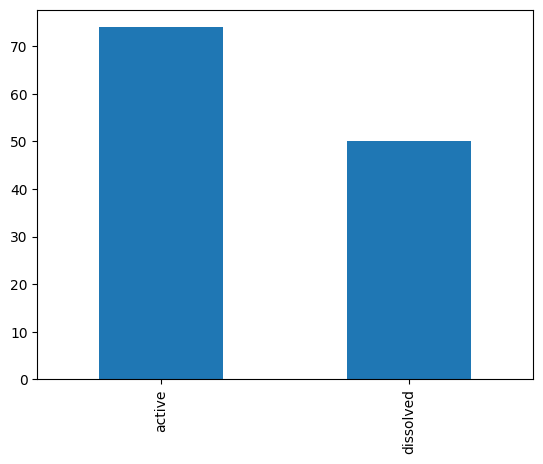

In [20]:
# To do some exploratory vis, we can graph counts of categorical data
fig, ax = plt.subplots()
df['company_status'].value_counts().plot(kind='bar')

In [21]:
# loc function is handy to quickly filter data! https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
df.loc[df["company_status"] == "active"]

,company_name,company_number,company_status,company_type,kind,links,date_of_cessation,date_of_creation,registered_office_address,sic_codes
7,MEDIA SURGERY LTD,SC577173,active,ltd,search-results#company,{'company_profile': '/company/SC577173'},NaN,2017-09-25,"{'address_line_1': '214 Union Street', 'locali...","[62012, 63120, 74100]"
8,OBERON TRADING SYSTEMS LIMITED,SC683617,active,ltd,search-results#company,{'company_profile': '/company/SC683617'},NaN,2020-12-14,"{'address_line_1': '29 Ashley Park Drive', 'lo...",[62012]
9,STREAMBA LTD,SC389674,active,ltd,search-results#company,{'company_profile': '/company/SC389674'},NaN,2010-11-29,"{'address_line_1': '28 Albyn Place', 'locality...","[62012, 62020]"
10,INSISO LTD,SC391782,active,ltd,search-results#company,{'company_profile': '/company/SC391782'},NaN,2011-01-19,"{'address_line_1': '5 Carden Place', 'locality...",[62012]
11,IOI GROUP LTD,SC646113,active,ltd,search-results#company,{'company_profile': '/company/SC646113'},NaN,2019-11-04,"{'address_line_1': 'Johnstone House', 'address...","[20130, 20140, 20590, 62012]"
...,...,...,...,...,...,...,...,...,...,...
118,DDK POSITIONING LIMITED,SC551326,active,ltd,search-results#company,{'company_profile': '/company/SC551326'},NaN,2016-11-28,"{'address_line_1': 'Balmoral Business Park', '...","[26511, 61200, 61900, 62012]"
119,MEJJ CONSULTING LTD,SC610845,active,ltd,search-results#company,{'company_profile': '/company/SC610845'},NaN,2018-10-15,"{'address_line_1': '6 Boyd Orr Place', 'locali...","[62012, 82990]"
121,DATIA IT LTD,SC663081,active,ltd,search-results#company,{'company_profile': '/company/SC663081'},NaN,2020-06-04,"{'address_line_1': '8 Bishopston Gardens', 'ad...","[62011, 62012, 62020, 62090]"
122,DIGICREATIONS LIMITED,SC761619,active,ltd,search-results#company,{'company_profile': '/company/SC761619'},NaN,2023-03-09,{'address_line_1': '151 Charleston Road North'...,"[62012, 62020, 63110, 63120]"


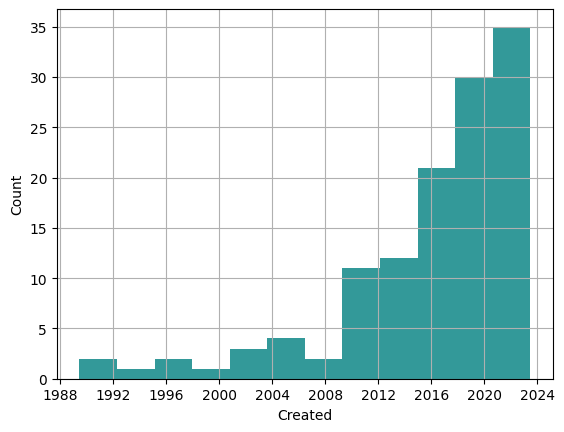

In [22]:
# We can interrogate distribution of registrations by putting them into 'bins'
# Here I have selected 12 'bins', try adjusting and seeing what works

from datetime import datetime
df['creation_datetime'] = pd.to_datetime(df['date_of_creation'])

ax = df["creation_datetime"].hist(bins=12, color='teal', alpha=0.8)
ax.set(xlabel='Created', ylabel='Count')
plt.show()

In [23]:
exploded_df = df.explode('sic_codes')
exploded_df.head()

,company_name,company_number,company_status,company_type,kind,links,date_of_cessation,date_of_creation,registered_office_address,sic_codes,creation_datetime
0,BSPOQ LIMITED,SC654410,dissolved,ltd,search-results#company,{'company_profile': '/company/SC654410'},2021-08-24,2020-02-13,"{'address_line_1': '11 Thistle Place', 'locali...",62012,2020-02-13
1,ICE IDENTIFICATION LIMITED,SC456271,dissolved,ltd,search-results#company,{'company_profile': '/company/SC456271'},2018-04-17,2013-08-07,{'address_line_1': 'Plenderleath Runcie Anders...,46510,2013-08-07
1,ICE IDENTIFICATION LIMITED,SC456271,dissolved,ltd,search-results#company,{'company_profile': '/company/SC456271'},2018-04-17,2013-08-07,{'address_line_1': 'Plenderleath Runcie Anders...,47410,2013-08-07
1,ICE IDENTIFICATION LIMITED,SC456271,dissolved,ltd,search-results#company,{'company_profile': '/company/SC456271'},2018-04-17,2013-08-07,{'address_line_1': 'Plenderleath Runcie Anders...,62012,2013-08-07
2,COKB LIMITED,SC455813,dissolved,ltd,search-results#company,{'company_profile': '/company/SC455813'},2016-03-15,2013-08-01,"{'address_line_1': '33 Holeburn Street', 'loca...",62012,2013-08-01


<Axes: >

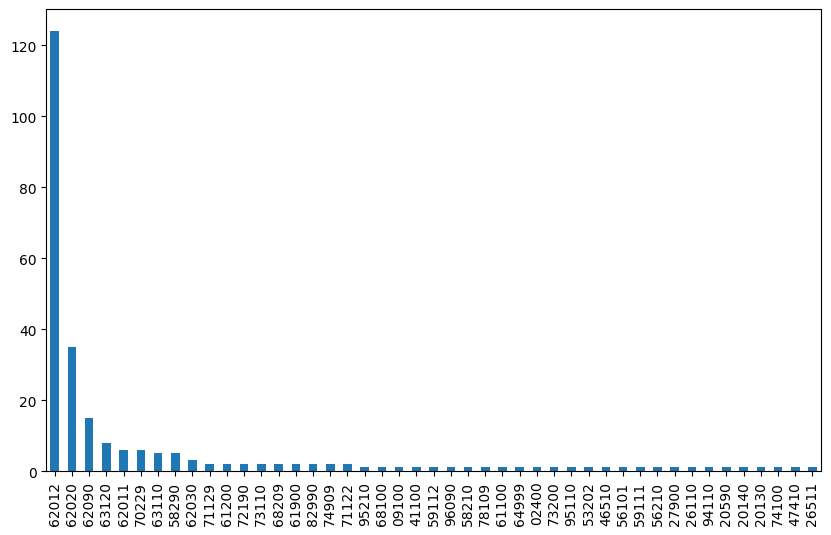

In [24]:
# Counts of different sic_codes
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 6))
exploded_df['sic_codes'].value_counts().plot(kind='bar')

In [ ]:
# Challenge ideas
# - This is only a portion of the data available for Aberdeen. What needs to be done to get the whole picture?
# - Directorship data doesn't come in search results, how would you augment our data with details of co. directors?
# - What about other cities or industries how might they compare?
# - Anything else you found interesting!

In [ ]:
# - This is only a portion of the data available for Aberdeen. What needs to be done to get the whole picture?
#

In [25]:
tables=pd.read_html("https://en.wikipedia.org/wiki/AB_postcode_area")

In [26]:
Aberdeen = tables[1]

In [27]:
Aberdeen.head()

,Postcode district,Post town,Coverage,Local authority area(s)
0,AB10,ABERDEEN,"Bridge of Dee, Mannofield, Ruthrieston",Aberdeen
1,AB11,ABERDEEN,"Ferryhill, Torry",Aberdeen
2,AB12,ABERDEEN,"Altens, Ardoe, Banchory Devenick, Blairs, Brid...","Aberdeen, Aberdeenshire"
3,AB13,MILLTIMBER,Milltimber,Aberdeen
4,AB14,PETERCULTER,"Peterculter, Upper Anguston",Aberdeen


In [28]:
Aberdeen.columns

Index(['Postcode district', 'Post town', 'Coverage',
       'Local authority area(s)'],
      dtype='object')

In [29]:
ABPostcode = Aberdeen['Postcode district'].tolist()

In [30]:
ABPostcode

['AB10',
 'AB11',
 'AB12',
 'AB13',
 'AB14',
 'AB15',
 'AB16',
 'AB21',
 'AB22',
 'AB23',
 'AB24',
 'AB25',
 'AB30',
 'AB31',
 'AB32',
 'AB33',
 'AB34',
 'AB35',
 'AB36',
 'AB37',
 'AB38',
 'AB39',
 'AB41',
 'AB42',
 'AB43',
 'AB44',
 'AB45',
 'AB51',
 'AB52',
 'AB53',
 'AB54',
 'AB55',
 'AB56',
 'AB99']

In [31]:
# Hey perkins check this i am getting an error anything you can help with

# Let's gather up some results
import time
postcodes = ["AB10", "AB11", "AB12", "AB13"]
results = []
request_url = "https://api.company-information.service.gov.uk/advanced-search/companies?size=5000&sic_codes=62012"

for postcode in ABPostcode:
    response = httpx.get(request_url+"&location="+postcode, auth=auth_tuple)
    result = json.loads(response.content)
    results = results + result.get('items', []) # concatenate result list
    time.sleep(100) # lets pause to allow server to breathe!

results

JSONDecodeError: ignored

# decline of certain industries 100 % bars over time